#actividad no.5 Redes neuronales completamente conectadas aplicadas en MNIST reconocimiento de dígitos manuscritos

In [5]:
import keras

mnist=keras.datasets.mnist

#cargue la division de entranamiento y prueba del conjunto de datos  mnist

(training_images,training_labels),(test_images,test_labesl)=mnist.load_data()



Label: 9
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 1

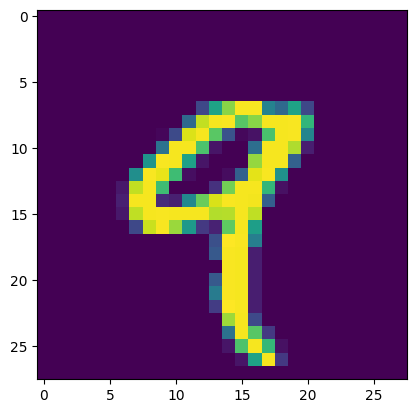

In [8]:



import numpy as np
import matplotlib.pyplot as plt

# Puedes poner aquí entre 0 y 59999
index = 4

# Imprime la etiqueta y la imagen.
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n {training_images[index]}')

# Visualiza la imagen
plt.imshow(training_images[index])

In [9]:
# normalizacion de los datos :

# normaliza los valores de pixles de las imagenes dividiendo or 255.0, lo que asegura qu elos valores esten en el rango [0,1]

training_images=training_images/255.0

test_images=test_images/255.0




In [11]:
#construir el modelo 

#Define un modelo secuencial utilizando keras.models.sequential(). Este modelo consta de una capa de aplanamiento Flatten 
# paa convertir la imagen 2D en un vector 1D, seguida de dos capas completamente conectadas (Dense) con funciones de activacion relu y softmax

model=keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),  #Esta capa aplana la entrada, que es una imagen de 28x28 píxeles, en un vector de 784 elementos (28*28). Esto es necesario porque las capas densas (fully connected) esperan vectores unidimensionales como entrada.
                               keras.layers.Dense(128,activation='relu'),
                               keras.layers.Dense(10,activation='softmax')])  #Esta es otra capa totalmente conectada, pero con 10 neuronas, una para cada clase en el dataset MNIST (dígitos del 0 al 9). La función de activación softmax convierte las salidas en probabilidades, sumando 1, lo que facilita la clasificación.



c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history=model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8789 - loss: 0.4247
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9660 - loss: 0.1145
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9768 - loss: 0.0768
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0552
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9876 - loss: 0.0422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9903 - loss: 0.0325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9915 - loss: 0.0277
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0212
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9955 - loss: 0.0158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9946 - loss: 0.0169


<Axes: >

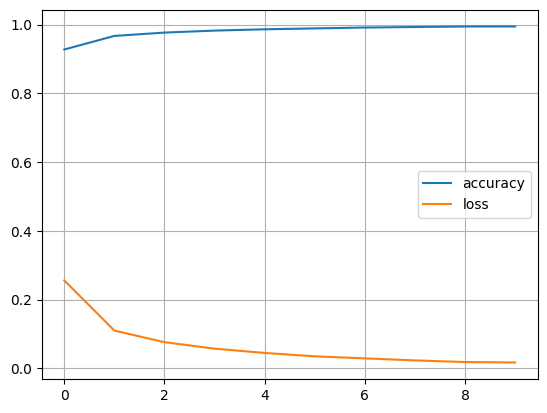

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(grid=True)

In [15]:
history

In [19]:
#evaluar el modelo en el conjunto de entrenamiento 

loss=accuracy=model.evaluate(training_images,training_labels)

print("Perdida en el conjunto de entrenamiento:", loss)
print("Precision en el conjunto de entrenamiento:", accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 625us/step - accuracy: 0.9965 - loss: 0.0119
Perdida en el conjunto de entrenamiento: [0.01236552931368351, 0.9964333176612854]
Precision en el conjunto de entrenamiento: [0.01236552931368351, 0.9964333176612854]


In [21]:
# evaluacion con datos no vistos 

loss=accuracy=model.evaluate(test_images,test_labesl)

print("Perdida en el conjunto de prueba:", loss)
print("Precision en el conjunto de prueba:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.9760 - loss: 0.0942
Perdida en el conjunto de prueba: [0.08438553661108017, 0.9782000184059143]
Precision en el conjunto de prueba: [0.08438553661108017, 0.9782000184059143]


In [22]:
#Predicion de una muestra:
model.predict()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\jhinn\AppData\Local\Temp\ipykernel_1568\1266953961.py", line 2, in <module>
    model.predict()
  File "c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\jhinn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 119, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: TensorFlowTrainer.predict() missing 1 required positional argument: 'x'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c